# Parte 5

Preparazione dei codici relativi all'applicazione del metodo di eliminaziona gaussiana e sua equivalente fattorizzazione con/senza pivoting.

## Introduzione

In [1]:
A = randn(5)

A =

  -1.916873   0.226273   0.817641  -0.095036  -1.012522
   0.526588  -2.179062  -0.429756   0.230489  -0.241151
   0.433757  -0.531894  -0.983162   1.003970  -0.203830
  -0.739108   0.107111   0.848587   0.811920  -0.847591
   0.652750   0.427549   0.274736  -0.088849   0.846899



In [2]:
L = tril(A)

L =

  -1.91687   0.00000   0.00000   0.00000   0.00000
   0.52659  -2.17906   0.00000   0.00000   0.00000
   0.43376  -0.53189  -0.98316   0.00000   0.00000
  -0.73911   0.10711   0.84859   0.81192   0.00000
   0.65275   0.42755   0.27474  -0.08885   0.84690



In [3]:
L_2 = tril(A, -1) + eye(5)

L_2 =

   1.00000   0.00000   0.00000   0.00000   0.00000
   0.52659   1.00000   0.00000   0.00000   0.00000
   0.43376  -0.53189   1.00000   0.00000   0.00000
  -0.73911   0.10711   0.84859   1.00000   0.00000
   0.65275   0.42755   0.27474  -0.08885   1.00000



In [4]:
U = triu(A)

U =

  -1.91687   0.22627   0.81764  -0.09504  -1.01252
   0.00000  -2.17906  -0.42976   0.23049  -0.24115
   0.00000   0.00000  -0.98316   1.00397  -0.20383
   0.00000   0.00000   0.00000   0.81192  -0.84759
   0.00000   0.00000   0.00000   0.00000   0.84690



Dato il sistema lineare:


$$\begin{cases} 2x = 2 \\ 3x + 5y = 8 \end{cases}$$

Verificare che la sua soluzione è: $[1, 1]$.

In [5]:
A =  [2 0; 3 5] % matrice dei coefficienti
b = [2; 8] % vettore dei termini noti

[x] = linsolve(A, b)

A =

   2   0
   3   5

b =

   2
   8

x =

   1
   1



## Algoritmi per il metodo di eliminazione gaussiana

### Gauss semplice
Calcola la fattorizzazione LU usando l'algoritmo di Gauss senza strategie di pivoting.

In [6]:
function [L, U, flag] = gauss_simple(A)

    [n,m] = size(A);
    flag = 0;

    if n ~= m, 
        disp('errore: matrice non quadrata'), 
        L = []; 
        U = []; 
        P = []; 
        err = 1; 
        return, 
    end

    U = A;

    for k=1:n-1

        if U(k,k) ==  0,
            disp('elemento diagonale nullo'), 
            L = []; 
            e = 1; return, end
        %Eliminazione gaussiana
        U(k+1:n,k)=U(k+1:n,k)/U(k,k);                         
        U(k+1:n,k+1:n)=U(k+1:n,k+1:n)-U(k+1:n,k)*U(k,k+1:n);
    end

    L=tril(U,-1)+eye(n); % Estrae i moltiplicatori 
    U=triu(U);           % Estrae la parte triangolare superiore + diagonale
end  

### Gauss parziale

Calcola la fattorizzazione LU usando l'algoritmo di Gauss con strategia di pivoting parziale.

In [7]:
function [L, U, P, err] = gauss_partial(A)

    [n,m] = size(A);
    err = 0;
    
    if n ~= m, 
        disp('errore: matrice non quadrata'),  
        L = []; 
        U = []; 
        P = []; 
        err = 1;
        return,
    end

    U = A; 
    P = eye(n);
    
    for k = 1:n-1
    
    % Scelta pivot parziale + scambi su U e P
    [pivot, ir_pivot] = max(abs(U(k:n, k))); 
    ir_pivot = ir_pivot + (k-1); 
    
    if pivot == 0, 
        disp('pivot nullo'),
        L = []; 
        err = 1;
        return, 
    end
    
    if ir_pivot  ~= k
        temp = U(k,:);
        U(k,:) = U(ir_pivot,:);
        U(ir_pivot,:) = temp;
        
        temp = P(k,:); 
        P(k,:) = P(ir_pivot,:); 
        P(ir_pivot,:) = temp;
    end

    % Eliminazione gaussiana
    U(k+1:n, k) = U(k+1:n, k) / U(k, k); % Memorizza i moltiplicatori
    U(k+1:n, k+1:n) = U(k+1:n, k+1:n) - U(k+1:n, k) * U(k, k+1:n);
    end

    L = tril(U,-1) + eye(n); % Estrae i moltiplicatori 
    U = triu(U);           % Estrae la parte triangolare superiore+diagonale
end

### Gauss totale

Calcola la fattorizzazione LU usando l'algoritmo di Gauss con strategia di pivoting totale.

In [8]:
function [L, U, P, Q, err] = gauss_total(A)

    [n,m]=size(A);
    err = 0;

    if n ~= m, 
        disp('errore: matrice non quadrata'),  
        L = []; 
        U = []; 
        P = []; 
        Q = []; 
        err = 1;
        return,
    end

    U = A;
    P = eye(n);
    Q = eye(n);
    for k = 1:n-1

        % Scelta pivot totale + scambi su U, P e Q 
        [temp_pivot, temp_ir_pivot] = max(abs(U(k:n, k:n)));
        [pivot, ic_pivot] = max(temp_pivot);
        ir_pivot = temp_ir_pivot(ic_pivot) + k - 1;
        ic_pivot = ic_pivot + k - 1;
        
        if pivot == 0,
            disp('pivot nullo'),
            L = [];
            err = 1;
            return,
        end
        
        if ir_pivot ~= k
            temp = U(k,:); 
            U(k,:) = U(ir_pivot,:); 
            U(ir_pivot,:) = temp;
            
            temp = P(k,:); 
            P(k,:) = P(ir_pivot,:); 
            P(ir_pivot,:) = temp; 
        end
        
        if ic_pivot ~= k
            temp = U(:,k); 
            U(:, k) = U(:, ic_pivot);
            U(:, ic_pivot) = temp;
            
            temp = Q(:, k); 
            Q(:, k) = Q(:, ic_pivot);
            Q(:, ic_pivot) = temp;
        end
        
        U(k+1:n, k) = U(k+1:n, k) / U(k,k);
        U(k+1:n, k+1:n) = U(k+1:n, k+1:n) - U(k+1:n, k) * U(k, k+1:n);
    end

    L = tril(U,-1) + eye(n); % Estrae i moltiplicatori
    U = triu(U);           % Estrae la parte triangolare superiore+diagonale

end

### L solve
Applicazione del metodo di sostituzione in avanti nell'ambito della fattorizzazione LU. Restituisce il vettore delle soluzioni `x` risolvendo il sistema lineare `Lx = b`.

In [9]:
function [x, err] = lsolve(L, b)

err = 0;
[n, m] = size(L);

if n ~= m
    printf('La matrice L non è quadrata!');
    x = [];
    err = 1;
    return
end

% se almeno un elemento è nullo allora il risultato è false
if ~all(diag(L))
    printf('La matrice non è singolare');
    x = [];
    err = 1;
    return
end

x = zeros(n,1); % preallocazione

% risoluzione forward
for i= 1:n
    s = L(i, 1:i - 1) * x(1:i - 1);
    x(i) = (b(i) - s) / L(i, i);
end

end

### U solve

Applicazione del metodo di sostituzione all'indietro nell'ambito della fattorizzazione LU. Restituisce il vettore delle soluzioni `x` risolvendo il sistema lineare `Ux = b`.

In [10]:
function [x, err] = usolve(U, b)

err = 0;
[n, m] = size(U);

if n ~= m
    printf('La matrice U non è quadrata!');
    x = [];
    err = 1;
    return;
end

% se almeno un elemento è nullo allora il risultato è false
if ~all(diag(U))
    disp('La matrice non è singolare');
    x = [];
    err = 1;
    return;
end

x = zeros(n,1); % preallocazione

% risoluzione backward (si specifica il passo -1)
for i = n:-1:1
    s = U(i, i + 1:n) * x(i + 1:n);
    x(i) = (b(i) - s) / U(i, i);
end

end

### LU solve

Risolve un sistema lineare tramite matrici ottenute a partire dalla fattorizzazione LU.

    [x] = lusolve(L, U, P, Q, b) 

Restituisce il vettore delle soluzioni x a partire dal vettore dei termini noti b e dalla matrice dei coefficienti A fattorizzata.

P e Q, ottenute con la fattorizzazione parziale o totale, sono opzionali.

In [11]:
function [x, err] = lusolve(L, U, P, Q, b)

if isempty(P) && isempty(Q)
    [y, err] = lsolve(L, b);
    if ~err
        [x, err] = usolve(U, y);
    else
        return
    end
elseif isempty(Q)
    Pb = P * b;
    [y, err] = lsolve(L, Pb);
    if ~err
        [x, err] = usolve(U, y);
    else
        return
    end
else
    Pb = P * b;
    [z, err] = lsolve(L, Pb);
    if ~err
        [y, err] = usolve(U, z);
        x = Q * y;
    else
        return
    end
end

end

## Esercizio

Tramite verifica dell'accuratezza e dei tempi di esecuzione si vuole definire il grado di stabilità del metodo di eliminazione gaussiana con e senza pivoting e sia in caso di pivoting parziale che totale. Inoltre si vogliono confrontare le prestazioni di questi metodi rispetto alla funzione di libreria built-in `\`.

In [12]:
nmin = 100;
nmax = 200;
P = [];
Q = [];

x_n = (nmin : nmax); % campionamento di x

% gli errori relativi per ciascuna iterazione, per ciascun metodo,
% sono memorizzati in appositi vettori tramite preallocazione
err_rel_1 = zeros(1,length(x_n));
err_rel_2 = zeros(1,length(x_n));
err_rel_3 = zeros(1,length(x_n));
err_rel_4 = zeros(1,length(x_n));

% i tempi di calcolo per ciascuna iterazione, per ciascun metodo,
% sono memorizzati in appositi vettori tramite preallocazione
toc_1 = zeros(1,length(x_n));
toc_2 = zeros(1,length(x_n));
toc_3 = zeros(1,length(x_n));
toc_4 = zeros(1,length(x_n));

for n = nmin:nmax
    
    A = gallery('orthog', n, 1); % matrice di test
    xesatta = (1 : n)'; % calcolo soluzione esatta
    b = A * xesatta; % calcolo termine noto
    
    % 1. calcolo soluzione con gauss semplice
    tic
    [L_1, U_1, err_1] = gauss_simple(A);
    
    if ~err_1
        [x_1, err_11] = lusolve(L_1, U_1, P, Q, b);
        toc_1(n - nmin + 1) = toc;
        if ~err_11
            err_rel_1(n - nmin + 1) = norm(xesatta - x_1) / norm(xesatta);
        end
    end
    
    % 2. calcolo soluzione con gauss con pivoting parziale
    tic
    [L_2, U_2, P_2] = gauss_partial(A);
    [x_2] = lusolve(L_2, U_2, P_2, Q, b);
    toc_2(n - nmin + 1) = toc;
    
    err_rel_2(n - nmin + 1) = norm(xesatta - x_2) / norm(xesatta);
    
    % 3. calcolo soluzione con gauss con pivoting totale
    tic
    [L_3, U_3, P_3, Q_3] = gauss_total(A);
    [x_3] = lusolve(L_3, U_3, P_3, Q_3, b);
    toc_3(n - nmin + 1) = toc;
    
    err_rel_3(n - nmin + 1) = norm(xesatta - x_3) / norm(xesatta);
    
    % 4. calcolo soluzione con funzione built-in
    tic
    x_4 = A \ b;
    toc_4(n - nmin + 1) = toc;

    err_rel_4(n - nmin + 1) = norm(xesatta - x_4) / norm(xesatta);
end

### Rappresentazione grafica dei risultati

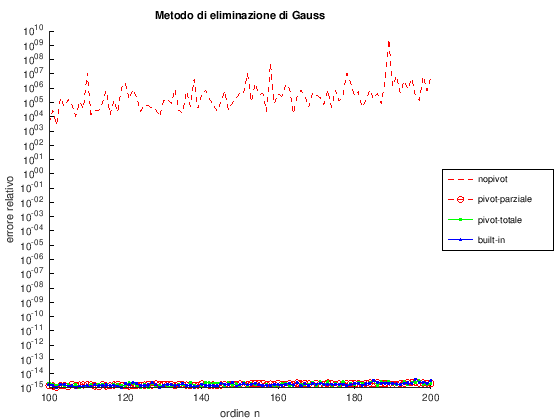

In [15]:
figure(1)
semilogy(x_n, err_rel_1, 'r--', ...
        x_n, err_rel_2, 'ro--', ...
        x_n, err_rel_3, 'g.-', ...
        x_n, err_rel_4, 'b.-');

title("Metodo di eliminazione di Gauss");
legend("nopivot","pivot-parziale","pivot-totale", "built-in", ...
    'location','eastoutside');
xlabel('ordine n'); 
ylabel('errore relativo');
box off;
warning ("off", "Octave:negative-data-log-axis");

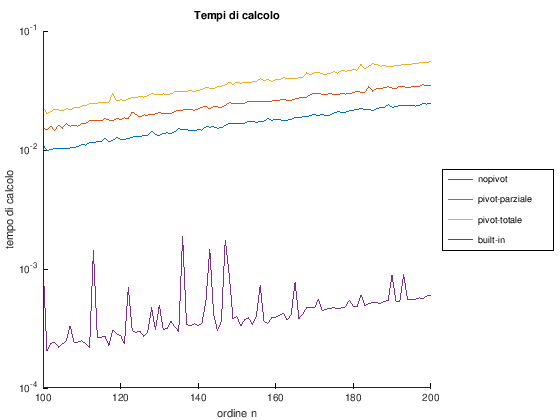

In [14]:
figure(2);
semilogy(x_n, toc_1, x_n, toc_2, x_n, toc_3, x_n, toc_4);
title("Tempi di calcolo");
legend('nopivot', "pivot-parziale", "pivot-totale", "built-in", ...
    'location','eastoutside');
xlabel('ordine n'); ylabel('tempo di calcolo');
box off;